# Ultrametric benchmark for continual learning - Artificial sequence - Data analysis, averaging across trials per condition
#### Simon Lebastard - 01/11/2020

First off let's go to the directory where the latest data was stored for artificial_8:

In [1]:
import os

project_root = '/home/proprietaire/Documents/Workspace/Jobs/Columbia/ultrametric_benchmark/Ultrametric-benchmark'

In [2]:
os.chdir(project_root)
from result_loader import ResultSet

In [3]:
dataset = 'artificial_32'
nnarchi = 'FCL20'
seq_length = 20000
n_batches = 10
seq_genr_type = 'twofold_split'

# Foar artificial ultrametric dataset only
linear_ratio_for_artificial_seq = 8
artificial_seq_len = 200

In [4]:
os.chdir(project_root+'/Results')

dataroot = project_root+'/Results/' + dataset + '/' + nnarchi + '/' + seq_genr_type + '_length' + str(seq_length)+'_batches'+str(n_batches)
if 'artificial' in dataset:
    dataroot += '_seqlen'+str(artificial_seq_len)+'_ratio'+str(linear_ratio_for_artificial_seq)

In [16]:
# artificial_8 datapaths
datapaths = {
    ('artificial_8', 'CNN', 'temporal_correlation', 'ratio_5'): { #lr 0.01
        (0.15, 10): [
			'T0.150_Memory0_block10_200113_20591578945581'
			],
        (0.15, 100): [
			'T0.150_Memory0_block100_200113_21261578947211'
			],
        (0.15, 1000): [
			'T0.150_Memory0_block1000_200113_21531578948799'
			],
        (0.40, 10): [
			'T0.400_Memory0_block10_200113_21071578946032'
			],
        (0.40, 100): [
			'T0.400_Memory0_block100_200113_21361578947778'
			],
        (0.40, 1000): [
			'T0.400_Memory0_block1000_200113_22011578949298'
			],
        (0.65, 10): [
			'T0.650_Memory0_block10_200113_21171578946647'
			],
        (0.65, 100): [
			'T0.650_Memory0_block100_200113_21451578948317'
			],
        (0.65, 1000): [
			'T0.650_Memory0_block1000_200113_22101578949858'
			]
    },
    ('artificial_8', 'FCL6', 'uniform', 'ratio_5'): {#lr 0.01 
        (0.15, 10): [
			'T0.150_Memory0_block10_200116_232209'
			],
        (0.15, 100): [
			'T0.150_Memory0_block10_200116_232209'
			],
        (0.15, 1000): [
			'T0.150_Memory0_block10_200116_232209'
			],
        (0.40, 10): [
			'T0.150_Memory0_block10_200116_232209'
			],
        (0.40, 100): [
			'T0.150_Memory0_block10_200116_232209'
			],
        (0.40, 1000): [
			'T0.150_Memory0_block10_200116_232209'
			],
        (0.65, 10): [
			'T0.150_Memory0_block10_200116_232209'
			],
        (0.65, 100): [
			'T0.150_Memory0_block10_200116_232209'
			],
        (0.65, 1000): [
			'T0.150_Memory0_block10_200116_232209'
			]
    },
    ('artificial_8', 'FCL10', 'uniform', 'ratio_5'): { #lr 0.01
        (0.15, 10): [
			'T0.150_Memory0_block10_200116_232209'
			],
        (0.15, 100): [
			'T0.150_Memory0_block10_200116_232209'
			],
        (0.15, 1000): [
			'T0.150_Memory0_block10_200116_232209'
			],
        (0.40, 10): [
			'T0.150_Memory0_block10_200116_232209'
			],
        (0.40, 100): [
			'T0.150_Memory0_block10_200116_232209'
			],
        (0.40, 1000): [
			'T0.150_Memory0_block10_200116_232209'
			],
        (0.65, 10): [
			'T0.150_Memory0_block10_200116_232209'
			],
        (0.65, 100): [
			'T0.150_Memory0_block10_200116_232209'
			],
        (0.65, 1000): [
			'T0.150_Memory0_block10_200116_232209'
			]
    },
    ('artificial_8', 'FCL20', 'uniform', 'ratio_5'): { #lr 0.01
        (0.15, 10): [
			'T0.150_Memory0_block10_200116_225307'
			],
        (0.15, 100): [
			'T0.150_Memory0_block10_200116_225307'
			],
        (0.15, 1000): [
			'T0.150_Memory0_block10_200116_225307'
			],
        (0.40, 10): [
			'T0.150_Memory0_block10_200116_225307'
			],
        (0.40, 100): [
			'T0.150_Memory0_block10_200116_225307'
			],
        (0.40, 1000): [
			'T0.150_Memory0_block10_200116_225307'
			],
        (0.65, 10): [
			'T0.150_Memory0_block10_200116_225307'
			],
        (0.65, 100): [
			'T0.150_Memory0_block10_200116_225307'
			],
        (0.65, 1000): [
			'T0.150_Memory0_block10_200116_225307'
			]
    },
    ('artificial_8', 'CNN', 'onefold_split', 'ratio_5'): { #lr 0.01
        (0.15, 10): [
			'T0.150_Memory0_block10_200114_20141579029267'
			],
        (0.15, 100): [
			'T0.150_Memory0_block100_200114_20421579030940'
			],
        (0.15, 1000): [
			'T0.150_Memory0_block1000_200114_21171579033036'
			],
        (0.40, 10): [
			'T0.400_Memory0_block10_200114_20261579030000'
			],
        (0.40, 100): [
			'T0.400_Memory0_block100_200114_20541579031648'
			],
        (0.40, 1000): [
			'T0.400_Memory0_block1000_200114_21291579033774'
			],
        (0.65, 10): [
			'T0.650_Memory0_block10_200114_20341579030466'
			],
        (0.65, 100): [
			'T0.650_Memory0_block100_200114_21061579032367'
			],
        (0.65, 1000): [
			'T0.650_Memory0_block1000_200114_21381579034301'
			]
    },
     ('artificial_8', 'CNN', 'twofold_split', 'ratio_5'): { #lr 0.01
        (0.15, 10): [
			'T0.150_Memory0_block10_200113_22571578952645'
			],
        (0.15, 100): [
			'T0.150_Memory0_block100_200114_01361578962218'
			],
        (0.15, 1000): [
			'T0.150_Memory0_block1000_200114_02171578964665'
			],
        (0.40, 10): [
			'T0.400_Memory0_block10_200113_23051578953127'
			],
        (0.40, 100): [
			'T0.400_Memory0_block100_200114_01431578962639'
			],
        (0.40, 1000): [
			'T0.400_Memory0_block1000_200114_02271578965236'
			],
        (0.65, 10): [
			'T0.650_Memory0_block10_200113_23131578953628'
			],
        (0.65, 100): [
			'T0.650_Memory0_block100_200114_02081578964107'
			],
        (0.65, 1000): [
			'T0.650_Memory0_block1000_200114_02391578965965'
			]
    },
    ('artificial_16', 'CNN', 'temporal_correlation', 'ratio_1'): { #lr 0.01
        (0.15, 10): [
			'T0.150_Memory0_block10_200112_22211578864068'
			],
        (0.15, 100): [
			'T0.150_Memory0_block100_200112_23051578866751'
			],
        (0.15, 1000): [
			'T0.150_Memory0_block1000_200112_23541578869670'
			],
        (0.4, 10): [
			'T0.400_Memory0_block10_200112_22351578864916'
			],
        (0.4, 100): [
			'T0.400_Memory0_block100_200112_23211578867661'
			],
        (0.4, 1000): [
			'T0.400_Memory0_block1000_200113_00101578870650'
			],
        (0.65, 10): [
			'T0.650_Memory0_block10_200112_22501578865859'
			],
        (0.65, 100): [
			'T0.650_Memory0_block100_200112_23371578868671'
			],
        (0.65, 1000): [
			'T0.650_Memory0_block1000_200113_00331578872009'
			]
    },
    ('artificial_32', 'FCL6', 'temporal_correlation', 'ratio_8'): { #lr 0.01
        (0.15, 10): [
			'T0.150_Memory0_block10_200117_195604'
			],
        (0.15, 100): [
			'T0.150_Memory0_block100_200117_221949'
			],
        (0.15, 1000): [
			'T0.150_Memory0_block1000_200117_223529'
			],
        (0.4, 10): [
			'T0.400_Memory0_block10_200117_190113'
			],
        (0.4, 100): [
			'T0.400_Memory0_block100_200117_191751'
			],
        (0.4, 1000): [
			'T0.400_Memory0_block1000_200117_193308'
			],
        (0.65, 10): [
			'T0.650_Memory0_block10_200117_202532'
			],
        (0.65, 100): [
			'T0.650_Memory0_block100_200117_204307'
			],
        (0.65, 1000): [
			'T0.650_Memory0_block1000_200117_205940'
			]
    },
    ('artificial_1024', 'CNN', 'temporal_correlation', 'ratio_5'): { #lr 0.01
        (0.15, 10): [
			'T0.150_Memory0_block10_200115_18121579108346'
			],
        (0.15, 100): [
			'T0.150_Memory0_block100_200115_15031579118601'
			],
        (0.15, 1000): [
			'T0.150_Memory0_block1000_200115_12541579110877'
			],
        (0.4, 10): [
			'T0.400_Memory0_block10_200115_20201579116049'
			],
        (0.4, 100): [
			'T0.400_Memory0_block100_200115_18141579130057'
			],
        (0.4, 1000): [
			'T0.400_Memory0_block1000_200115_14411579117303'
			],
        (0.65, 10): [
			'T0.650_Memory0_block10_200115_22221579123326'
			],
        (0.65, 100): [
			'T0.650_Memory0_block100_200116_00241579130655'
			],
        (0.65, 1000): [
			'T0.650_Memory0_block1000_200115_17151579126537'
			]
    },
    ('artificial_32', 'FCL20', 'twofold_split', 'ratio_8'): { #lr 0.05
        (0.40, 100): [
			'T0.400_Memory0_block100_200124_233400'
			]
    }
}

In this notebook, we'll loop through the files produced by the ultrametric framework accross temperatures and shuffle block size, and construct dictionnaries indexed by [T, blocksz].
We will then use those dicts to create the plots for DARPA.

Now let's load standard packages and find out about the content of each file:

In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pdb

import pickle
%matplotlib inline

In [17]:
datapaths[(dataset, nnarchi, seq_genr_type, 'ratio_'+str(linear_ratio_for_artificial_seq))]

{(0.4, 100): ['T0.400_Memory0_block100_200124_233400']}

In [18]:
rs = ResultSet(dataroot, datapaths[(dataset, nnarchi, seq_genr_type, 'ratio_'+str(linear_ratio_for_artificial_seq))])
rs.load_analytics()

load_data set to False. Data sequences not loaded.
load_atc set to False. Autocorrelations not loaded.


## Autocorrelation plots (computed a posteriori)

Let's plot the autocorrelation function to DARPA standards:

In [19]:
tree_l = 2**5
maxh = 2**19    
block_sizes = [1, 10, 100, 1000]
n_tests = 10

In [20]:
from statsmodels.tsa.stattools import acf

def make_ohe(y, n_labels):
    ohe = np.zeros((len(y), n_labels))    
    ohe[np.arange(len(y)),y] = 1
    return ohe

def sequence_autocor(lbl_sequence, n_labels, nlags=200, fft=True):
    length = len(lbl_sequence)
    lbl_ohe = make_ohe(lbl_sequence, n_labels)
    autocor = np.zeros(nlags)
    
    for lbl in range(n_labels):
        autocor_lbl = acf(
            lbl_ohe[:,lbl].tolist(),
            unbiased=True,
            nlags=nlags-1, #number of time points to evaluate autocorrelation for
            qstat=False, # allows to return the Ljung-Box q statistic
            fft=fft, # this is the fastest method, but impact on accuracy should be assessed when possible
            alpha=None # allows to compute confidence intervals
            )
        autocor = autocor + np.asarray(autocor_lbl)
    return autocor

In [ ]:
seq = rs.train_labels_orig[(0.65, 10)]

In [ ]:
atc = sequence_autocor(seq, nlags=500, 0n_labels=1024, fft=False)

In [21]:
from copy import deepcopy
import random

def shuffleblocks(seq, block_sz, snbr):
    lseq = len(seq)
    copied_seq = deepcopy(seq)
    sseq = []   # Will contain the shuffled sequence
    for k in range(snbr):
        begin, end = int(k*lseq/snbr), int((k+1)*lseq/snbr)
        bbegin, bend = int(begin/block_sz), int(end/block_sz)
        block_indices = [i for i in range(len(seq[:end])//block_sz)]
        random.shuffle(block_indices)
        for i in block_indices[bbegin:bend]:
            sseq += copied_seq[i*block_sz:(i+1)*block_sz]
    return sseq 

def get_atc(seq, blocks, snbr, T):
    tree_l = max(seq)+1
    plt.figure(1, figsize=(18,10))
    hlocs_stat = np.zeros(maxh-1)
    
    for i in range(tree_l):
        locs = np.array([j for j in range(len(seq)) if seq[j]==i])
        locss = deepcopy(locs)
        locss[:-1] = locss[1:]
        locsd = locss-locs
        bins = range(maxh)
        hlocs = np.histogram(locsd, bins, density=True)
        hlocs_stat = hlocs_stat + hlocs[0]/tree_l
        
    plt.loglog(
        bins[:-1],
        hlocs_stat,
        marker='.',
        ls = 'none',
        label='T={0:.2f} - Original sequence'.format(T)
    ) 
    for nfig, block_sz in enumerate(blocks):
        hlocs_stat = np.zeros(maxh-1)
        shuffleseq = shuffleblocks(seq, block_sz, snbr)
        #plt.figure(nfig+2)
        #plt.plot(shuffleseq)
        #plt.title(block_sz)
        for i in range(tree_l):
            locs = np.array([j for j in range(len(shuffleseq)) if shuffleseq[j]==i])
            locss = deepcopy(locs)
            locss[:-1] = locss[1:]
            locsd = locss-locs
            bins = range(maxh)
            hlocs = np.histogram(locsd, bins, density=True)
            hlocs_stat = hlocs_stat + hlocs[0]/tree_l
            
        plt.figure(1)    
        plt.loglog(
            bins[:-1],
            hlocs_stat,
            marker = '+',
            ls = 'none',
            label='T={0:.2f} - Shuffled with blocksz={1:d}'.format(T, block_sz),
            alpha=0.5) 
        plt.legend()

In [22]:
get_atc(rs.train_labels_orig[(0.4, 100)], block_sizes, n_tests, T=0.4)

TypeError: can only concatenate list (not "int") to list

## Autocorrelation plots (computed a priori)

In [ ]:
rs.atc_orig.keys()

In [ ]:
from matplotlib.colors import hsv_to_rgb

atc_fig = plt.figure(figsize=(14,2*9))
hsv_orig = (0, 0.9, 0.6)
n_omits = 30
markers = ['o','+','x']

atc_ax = plt.subplot(211)

params = (0.4, 10)
atc_orig = rs.atc_orig[params][n_omits:]
atc_ax.plot(
        atc_orig,
        marker='.',
        markersize=10,
        ls='solid',
        color = hsv_to_rgb(hsv_orig),
        label='T={0:.2f}, blocksz={1:d} - Original sequence'.format(params[0], params[1])
    )

for k, params in enumerate([(0.4, 10), (0.4, 100), (0.4, 1000)]):

    hsv_shfl = tuple([0.6, 1-k*0.2, 0.5+k*0.15]) 
    
    # Discard the first few data points
    
    atc_shfl = rs.atc_shfl[params][-1][n_omits:]

    atc_ax.plot(
        atc_shfl,
        marker=markers[k],
        ls='solid',
        color = hsv_to_rgb(hsv_shfl),
        label='T={0:.2f}, blocksz={1:d} - Shufled sequence'.format(params[0], params[1])
    )

plt.xscale("log")
plt.yscale("log")
    
plt.title('Autocorrelation function for original and shuffled sequences')
atc_ax.legend()


atc_ax = plt.subplot(212)

params = (0.65, 10)
atc_orig = rs.atc_orig[params][n_omits:]
atc_ax.plot(
        atc_orig,
        marker='.',
        markersize = 10,
        ls='solid',
        color = hsv_to_rgb(hsv_orig),
        label='T={0:.2f}, blocksz={1:d} - Original sequence'.format(params[0], params[1])
    )

for k, params in enumerate([(0.65, 10), (0.65, 100), (0.65, 1000)]):

    hsv_shfl = tuple([0.6, 1-k*0.2, 0.5+k*0.15])
    
    # Discard the first few data points
    
    atc_shfl = rs.atc_shfl[params][-1][n_omits:]

    atc_ax.plot(
        atc_shfl,
        marker=markers[k],
        ls='solid',
        color = hsv_to_rgb(hsv_shfl),
        label='T={0:.2f}, blocksz={1:d} - Shufled sequence'.format(params[0], params[1])
    )

plt.xscale("log")
plt.yscale("log")
    
plt.title('Autocorrelation function for original and shuffled sequences')
atc_ax.legend()

## Accuracy = f(t) plots

In [ ]:
acc_fig = plt.figure(figsize=(18,2*9))

hsv_orig = (0, 0.9, 0.6)
markers = ['o','+','x']


acc_ax = plt.subplot(211)
for param_id, params in enumerate([(0.4, 10), (0.4, 100), (0.4, 1000)]):
    
    hsv_shfl = tuple([0.6, 1-param_id*0.2, 0.5+param_id*0.15])
    
    acc_ax.plot(
        rs.var_acc_orig[params][:,0],
        marker = '.',
        markersize=10,
        ls = 'none',
        color = hsv_to_rgb(hsv_orig),
        label='T={0:.2f}, blocksz={1:d} - Original sequence'.format(params[0], params[1])
    )

    acc_ax.plot(
        rs.var_acc_shfl[params][:,0],
        marker=markers[param_id],
        markersize=10,
        ls = 'none',
        color = hsv_to_rgb(hsv_shfl),
        label='T={0:.2f}, blocksz={1:d} - Shuffled sequence'.format(params[0], params[1])
    )
    
plt.title('Accuracy as a function of time for original and shuffled sequences')
acc_ax.legend()

acc_ax = plt.subplot(313)
for param_id, params in enumerate([(0.65, 10), (0.65, 100), (0.65, 1000)]):
    
    hsv_shfl = tuple([0.6, 1-param_id*0.2, 0.5+param_id*0.15])
    
    acc_ax.plot(
        rs.var_acc_orig[params][:,0],
        marker = '.',
        markersize=10,
        ls = 'none',
        color = hsv_to_rgb(hsv_orig),
        label='T={0:.2f}, blocksz={1:d} - Original sequence'.format(params[0], params[1])
    )

    acc_ax.plot(
        rs.var_acc_shfl[params][:,0],
        marker=markers[param_id],
        markersize=10,
        ls = 'none',
        color = hsv_to_rgb(hsv_shfl),
        label='T={0:.2f}, blocksz={1:d} - Shuffled sequence'.format(params[0], params[1])
    )
    
plt.title('Accuracy as a function of time for original and shuffled sequences')
acc_ax.legend()

## Distribution of training labels along training sequence

In [ ]:
n_hists = 10

acc_fig = plt.figure(figsize=(18,n_hists*9))

for hist_id in range(n_hists):
    acc_ax = plt.subplot(n_hists, 1, 1+hist_id)

    #for params in list(rs.params.keys()):
    for params in [(0.4, 1000)]:
        total_seq_length = len(rs.train_labels_orig[params])
        label_data = rs.train_labels_orig[params][:(hist_id+1)*(total_seq_length//n_hists)]
    
        acc_ax.hist(
            label_data,
            range = (0, 32),
            density = True,
            alpha = 0.5,
            label = "Distribution of sequence labels for T={0:.2f}".format(params[0])
        )
        acc_ax.set_ylim(0, 0.3)
        
        acc_ax.legend()

## Predicted class distribution as function of test run

In [ ]:
def plot_class_distribution(param_tuple):

    cls_dstr_fig = plt.figure(figsize=(18,18))

    n_tests = int(rs.params[param_tuple][0][6])

    for test_run_q in range(10): #rs.params['test_nbr'] or whatever

        cls_dstr_ax = plt.subplot(5,2,test_run_q+1)

        test_run_id = int((test_run_q/10)*n_tests)
        cls_dstr_ax.bar(
            [k - 0.2 for k in range(8)],
            rs.var_pred_orig[params][test_run_id,0],
            color = 'b',
            width = 0.3
        )

        cls_dstr_ax.bar(
            [k + 0.2 for k in range(8)],
            rs.var_pred_shfl[params][test_run_id,0],
            color = 'r',
            width = 0.3
        )

        n_training_examples_seen = int(((test_run_id+1) / n_tests)*seq_length)
        plt.title('Distribution of predicted classes within test batch after training on {0:d} examples'.format(n_training_examples_seen))

In [ ]:
plot_class_distribution((0.15, 10))

In [ ]:
plot_class_distribution((0.15, 100))

In [ ]:
plot_class_distribution((0.15, 1000))

In [ ]:
plot_class_distribution((0.4, 10))

In [ ]:
plot_class_distribution((0.4, 100))

In [ ]:
plot_class_distribution((0.4, 1000))

In [ ]:
plot_class_distribution((0.65, 10))

In [ ]:
plot_class_distribution((0.65, 100))

In [ ]:
plot_class_distribution((0.65, 1000))

## Labels history

In [29]:
len(rs.train_labels_orig[(0.4, 100)][0])

20000

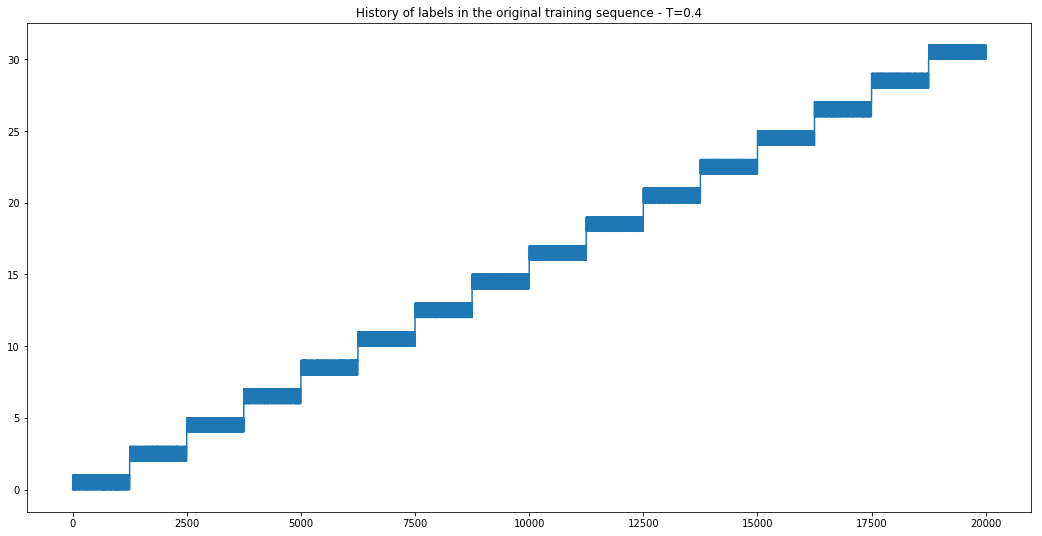

In [30]:
lbls_fig = plt.figure(figsize=(18,9))

for param_id, params in enumerate([(0.4, 100)]):
    lbls_ax = plt.subplot(1,1,1+param_id)
    lbls_ax.plot(rs.train_labels_orig[params][0])
    ttl = 'History of labels in the original training sequence - T='+str(params[0])
    plt.title(ttl)